Note: This code was a team effort by Group 1.

##### **In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).**

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [69]:
# import some basic libraries
import os
import pandas as pd


os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"


# import utility function for sample data path
from pymer4.utils import get_resource_path

Loading our data: 

Load the cleaned dataset 'combined_themepark_dataset.csv' into a pandas DataFrame.

In [70]:
data = pd.read_csv('combined_themepark_dataset.csv')

In [71]:
data.head(2)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...


In [72]:
import pymer4


# Specify the formula for the model
formula = 'engagement ~ Treatment + (1|Subject)'

# Create the Lmer model
model = pymer4.Lmer(formula, data=data)


In [80]:
# Fit the model
model.fit()

Model failed to converge with max|grad| = 0.896708 (tol = 0.002, component 1) 

Model failed to converge with max|grad| = 0.896708 (tol = 0.002, component 1) 

Linear mixed model fit by REML [’lmerMod’]
Formula: DV~IV2+(IV2|Group)

Family: gaussian	 Inference: parametric

Number of observations: 564	 Groups: {'Group': 47.0}

Log-likelihood: -2249.420 	 AIC: 4510.839

Random effects:

                 Name      Var     Std
Group     (Intercept)  161.413  12.705
Group             IV2    0.126   0.355
Residual               122.940  11.088

               IV1  IV2   Corr
Group  (Intercept)  IV2 -0.536

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),9.857,4.787,14.927,2.587,22.389,3.811,0.001,***
IV2,0.688,0.566,0.810,0.062,46.439,11.045,0.000,***


In [81]:
print(model)


pymer4.models.Lmer(fitted = True, formula = DV~IV2+(IV2|Group), family = gaussian)


In [73]:
# Load and checkout sample data
df = pd.read_csv(os.path.join(get_resource_path(), "sample_data.csv"))
print(df.head())

   Group   IV1  DV_l         DV       IV2  IV3
0      1  20.0     0   7.936508  4.563492  0.5
1      1  20.0     0  15.277778  0.000000  1.0
2      1  20.0     1   0.000000  0.000000  1.5
3      1  20.0     1   9.523810  0.000000  0.5
4      1  12.5     0   0.000000  0.000000  1.0


In [74]:
# Import the lmm model class
from pymer4.models import Lmer

In [75]:
# Initialize model instance using 1 predictor with random intercepts and slopes
model = Lmer("DV ~ IV2 + (IV2|Group)", data=df)

# Fit it
print(model.fit())

Model failed to converge with max|grad| = 0.896708 (tol = 0.002, component 1) 

Linear mixed model fit by REML [’lmerMod’]
Formula: DV~IV2+(IV2|Group)

Family: gaussian	 Inference: parametric

Number of observations: 564	 Groups: {'Group': 47.0}

Log-likelihood: -2249.420 	 AIC: 4510.839

Random effects:

                 Name      Var     Std
Group     (Intercept)  161.413  12.705
Group             IV2    0.126   0.355
Residual               122.940  11.088

               IV1  IV2   Corr
Group  (Intercept)  IV2 -0.536

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)     9.857   4.787   14.927  2.587  22.389   3.811  0.001  ***
IV2             0.688   0.566    0.810  0.062  46.439  11.045  0.000  ***


In [76]:
# Get population level coefficients
print(model.coefs)

             Estimate    2.5_ci    97.5_ci        SE         DF     T-stat  \
(Intercept)  9.857094  4.787487  14.926700  2.586581  22.389120   3.810858   
IV2          0.687975  0.565892   0.810058  0.062289  46.439194  11.044961   

                    P-val  Sig  
(Intercept)  9.326090e-04  ***  
IV2          1.382486e-14  ***  


In [77]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
print(model.fixef.head(5))

   (Intercept)       IV2
1     4.538175  0.881432
2    16.988103  0.640521
3     8.681741  0.838443
4     9.813423  0.869052
5     9.926038  0.187751


In [78]:
# Get group level deviates from population level coefficients (i.e. rfx)
print(model.ranef.head(5))

   X.Intercept.       IV2
1     -5.318919  0.193457
2      7.131010 -0.047454
3     -1.175353  0.150468
4     -0.043671  0.181077
5      0.068944 -0.500224


<Axes: xlabel='Estimate'>

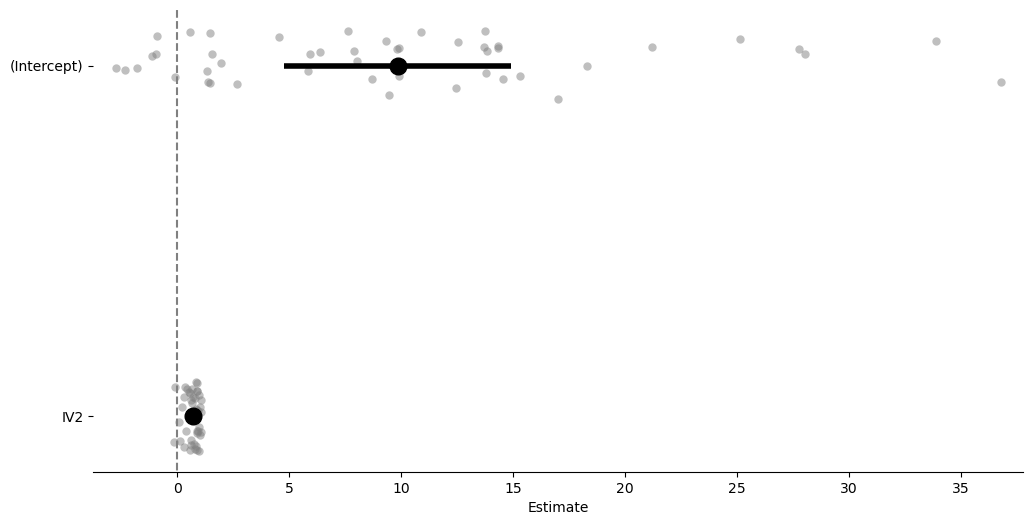

In [79]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()